Carga de Datos

In [ ]:
import pandas as pd

file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding='cp1252', sep=';')
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [8]:
df.shape

(10000, 22)

1. Cálculo de Estadísticas Descriptivas

In [9]:
estadisticas_descriptivas = df.describe()
print("Estadísticas Descriptivas:")
print(estadisticas_descriptivas)

Estadísticas Descriptivas:
                 id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.5687

2. Visualización de Datos

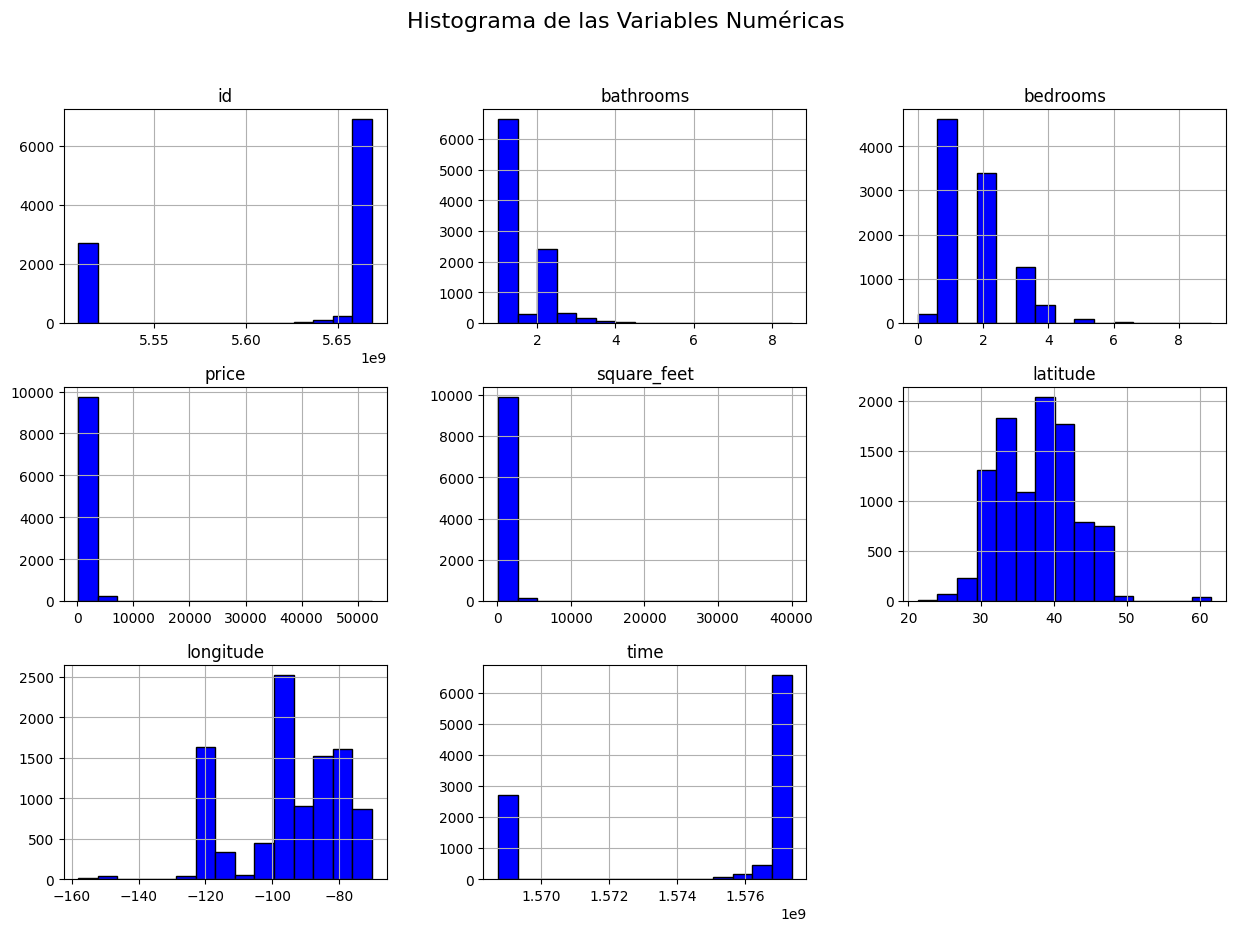

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograma de las Variables Numéricas', fontsize=16)
plt.show()

# Análisis del Histograma de las Variables Numéricas

Este histograma presenta la distribución de varias variables numéricas en el conjunto de datos. A continuación, se proporciona una interpretación para cada una de las variables mostradas:

# 1. **Baños**
Tiene una distribución sesgada a la derecha, lo que implica que la mayoría de las propiedades  que tienen estre 1 y 2 baños, hay algunas propiedades con más baños, pero son casos menos comunes (probablemente casas grandes o de lujo).

# 2. **Habitaciones**
Es una distribución asimétrica positiva, por ende, es sesgada a la derecha esto que implica la mayoría de las propiedades tienen entre 1 y 3 habitaciones.Existen algunas propiedades con más habitaciones, pero son casos atípicos (probablemente mansiones o edificios multifamiliares).

# 3. **Price**
Tiene una distribución sesgada a la derecha, por ende, la mayoría de las propiedades tienen precios bajos o moderados. Hay algunas propiedades con precios extremadamente altos, lo que indica la presencia de propiedades de lujo o comerciales en el conjunto de datos.

# 4. **Square Feet**
Tiene una distribución sesgada a la derecha.Esto implica la mayoría de las propiedades tienen áreas pequeñas o medianas. Hay algunas propiedades muy grandes, probablemente edificios comerciales o casas de lujo.

# 5. **Tiempo**
Tiene una distribución bimodal, por ende, hubo dos periodos distintos de alta actividad en la recolección de datos. Esto puede deberse a la fluctuaciones en el mercado inmobiliario.

Diagramas de caja para identificar valores atípicos

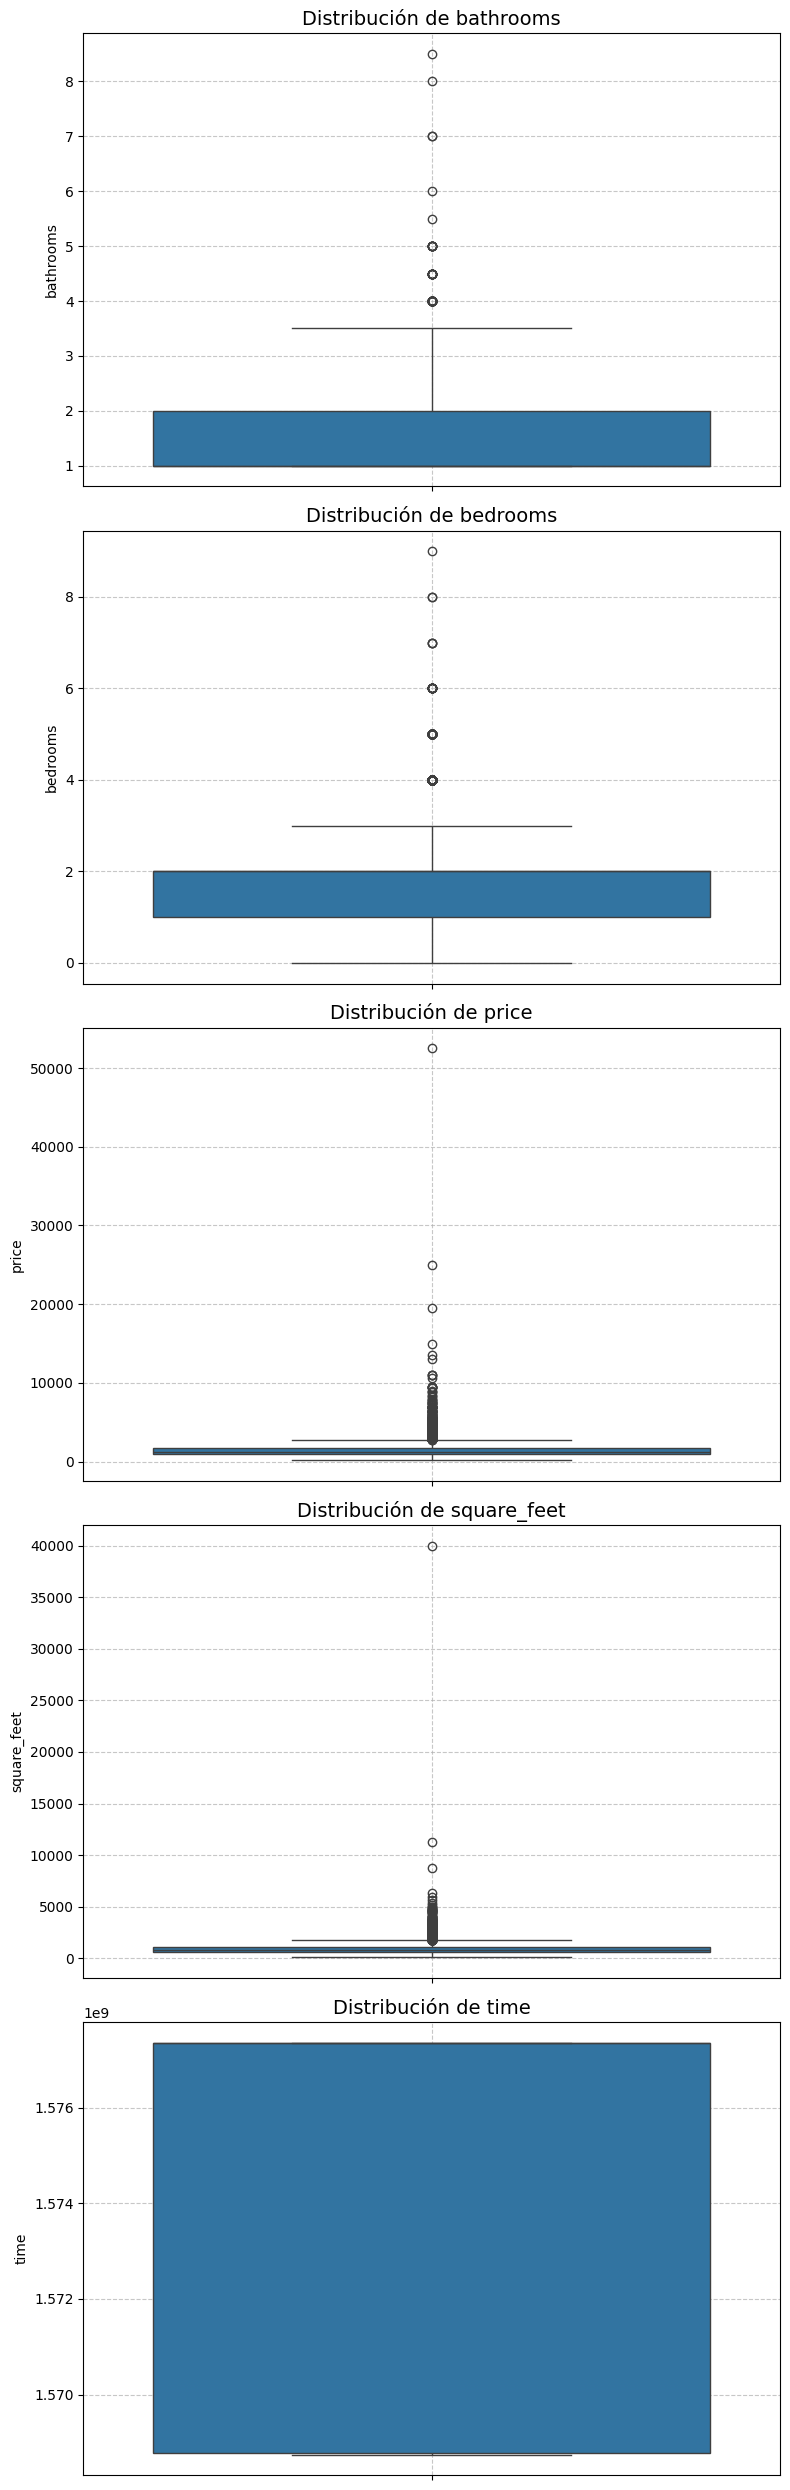

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'latitude', 'longitude'], errors='ignore')

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), figsize=(8, 5 * len(numeric_cols.columns)))

# Graficar cada variable numérica
for ax, col in zip(axes, numeric_cols.columns):
    sns.boxplot(y=df[col], ax=ax, showfliers=True)  # showfliers=True para ver outliers
    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()





# Análisis de Diagramas de Caja

Este diagrama de caja (boxplot) muestra la dispersión de varias variables numéricas en el conjunto de datos, resaltando sus valores atípicos, medianas y rangos intercuartiles.

1. **Baños**
La caja es pequeña, por ende hay una baja dispersión de los datos y se encuentra pocos valores atípicos que pueden ser de casas lujosas y bastante amplias.

2. **Habitaciones**
Los datos son poco dispersos y se tienen pocos valores atípicos con una propiedad de maxímo 9 habitaciones.

3. **Price**
Los precios son poco dispersos. Asímismo, gracias a la mediana se puede identificar que la mayoría de los precios estan en un rango bajo. Adicionalmente, hay muchos valores atípicos por encima de límite superior de la caja.

4. **Square Feet**
El tamaño de apartamentos son poco dispersos, pero existe una gran cantidad de datos atípicos por encima del límite superior de la caja.

5. **Tiempo**
Hay una gran cantidad de variabilidad de los datos, en dónde no se ecuentran datos atípicos

## Ubicación de los Apartamentos

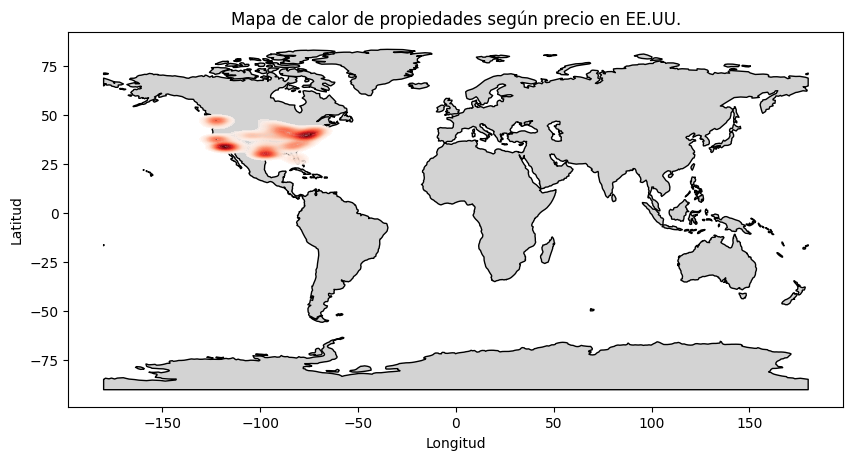

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import seaborn as sns

# Cargar el mapa base de EE.UU.
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black")

# Convertir latitud y longitud a numérico y eliminar NaN
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")  # Convertir precios
df = df.dropna(subset=["latitude", "longitude", "price"])

# Crear el mapa de calor basado en precios
sns.kdeplot(
    x=df["longitude"],
    y=df["latitude"],
    weights=df["price"],  # Ponderar por precio
    cmap="Reds",  # Escala de color rojo
    fill=True,
    alpha=0.6,
    levels=50,
    ax=ax
)

# Etiquetas y título
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Mapa de calor de propiedades según precio en EE.UU.")

plt.show()


## Correlación Precio

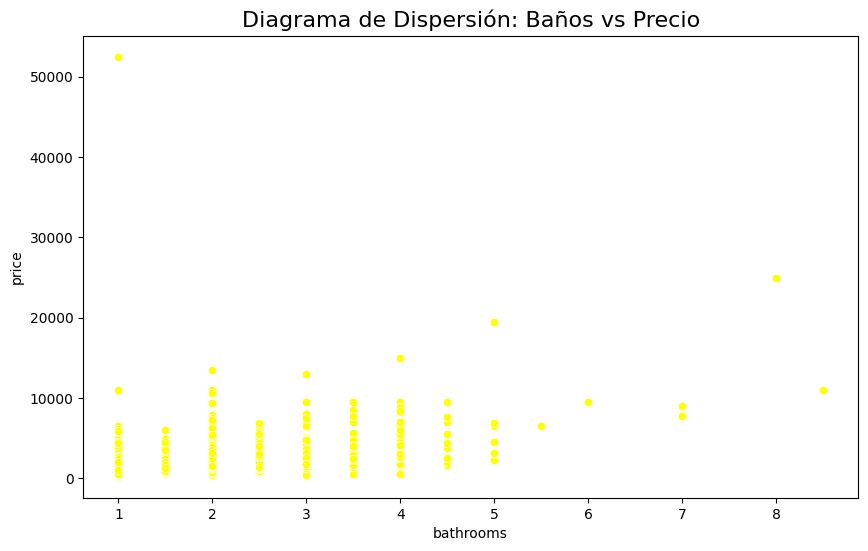

In [ ]:
# Diagramas de dispersión: Baños vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df, color='blue')
plt.title('Diagrama de Dispersión: Baños vs Precio', fontsize=16)
plt.show()

Se puede observar en la gráfica anterior no hay una relación lineal clara entre el número de baños y el precio. Hay precios bajos en casi todos los valores de baños, pero también algunos precios altos dispersos.La mayoría de los puntos están agrupados en valores bajos de bathrooms (entre 1 y 4 baños), lo que sugiere que la mayoría de las propiedades tienen pocas unidades sanitarias.

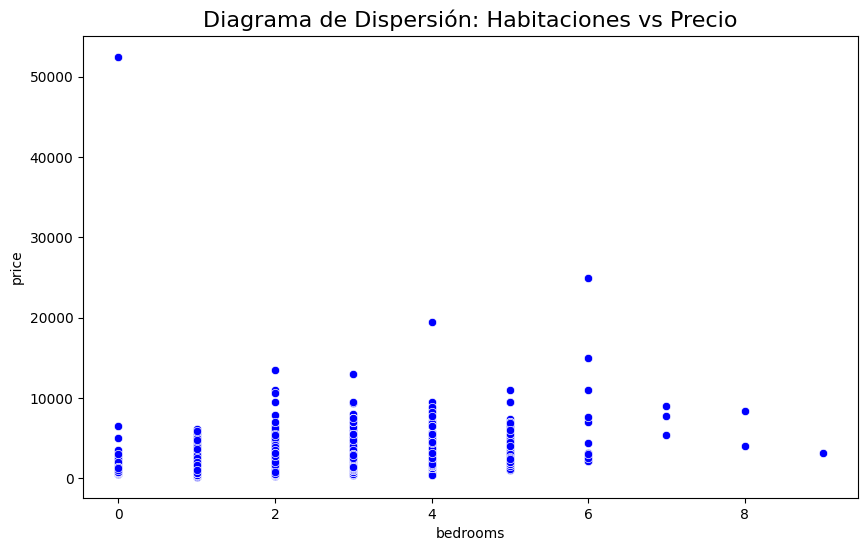

In [15]:
# Diagramas de dispersión: Habitaciones vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df, color='blue')
plt.title('Diagrama de Dispersión: Habitaciones vs Precio', fontsize=16)
plt.show()

Se puede observar que no existe una correlación clara entre la cantidad de habitaciones y el precio de los apartamentos. La mayoría tiene precios bajos.

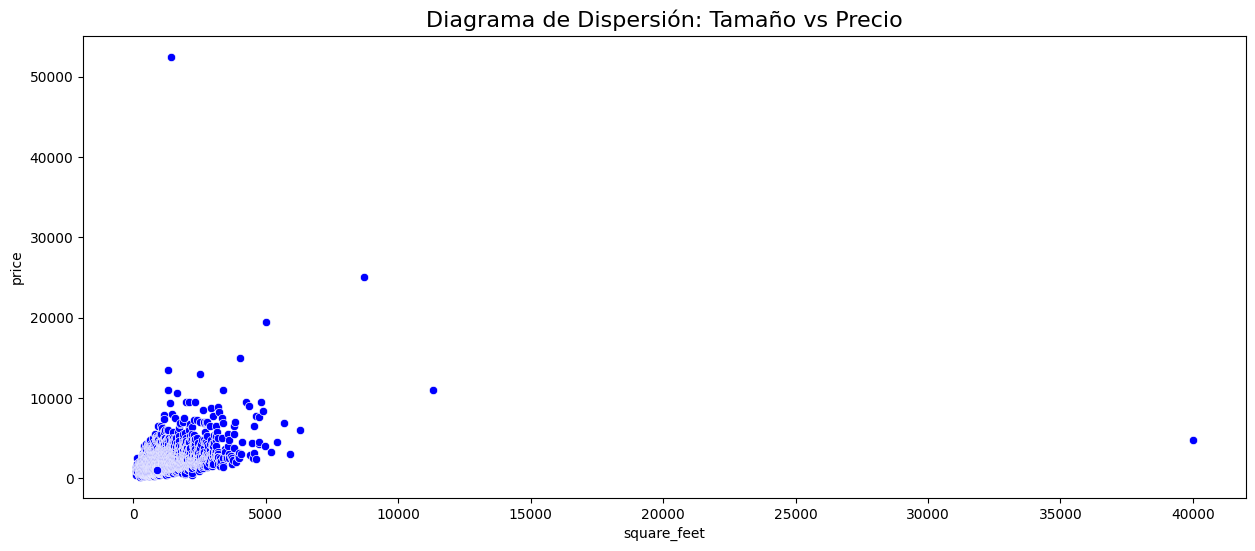

In [19]:
# Diagramas de dispersión: Habitaciones vs Precio
plt.figure(figsize=(15, 6))
sns.scatterplot(x='square_feet', y='price', data=df, color='blue')
plt.title('Diagrama de Dispersión: Tamaño vs Precio', fontsize=16)
plt.show()

##  Análisis de Calidad de Datos

Análisis de Completitud

In [21]:
porctIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porctIncompletitudAtributo.index,
    "Completitud (%)": 100 - porctIncompletitudAtributo.values,
    "Incompletitud (%)": porctIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,pets_allowed,58.398398,41.601602
1,amenities,64.544545,35.455455
2,address,66.796797,33.203203
3,cityname,99.329329,0.670671
4,state,99.329329,0.670671
5,bathrooms,99.659660,0.340340
6,bedrooms,99.929930,0.070070
7,body,100.000000,0.000000
8,id,100.000000,0.000000
9,category,100.000000,0.000000


Se puede observar que casi la mitad de los valores de la columna de pets_allowed esta vacía, igualmente hay una gran cantidad de datos faltantes en amenities y address

Verificación Valores Nulos

In [22]:
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
id                  0
category            0
title               0
body                0
amenities        3542
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4156
price               0
price_display       0
price_type          0
square_feet         0
address          3317
cityname           67
state              67
latitude            0
longitude           0
source              0
time                0
dtype: int64


Hay una gran cantidad de valores nulos en amenities, pets_allowed y address

Dependientes vs Dependientes

<Axes: >

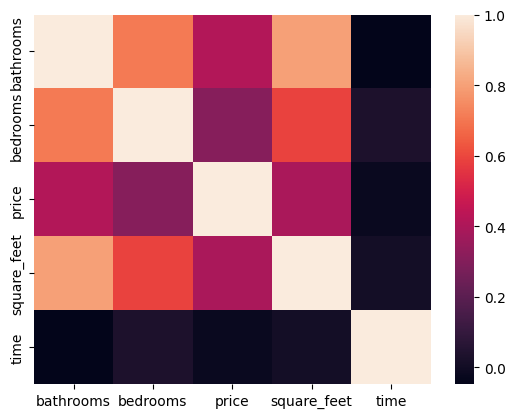

In [31]:
numeric_data = df.select_dtypes(include=[float, int]).drop(columns=['id', 'latitude', 'longitude', 'fee'], errors='ignore')
corr = numeric_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="rocket")

Independiente vs Dependiente

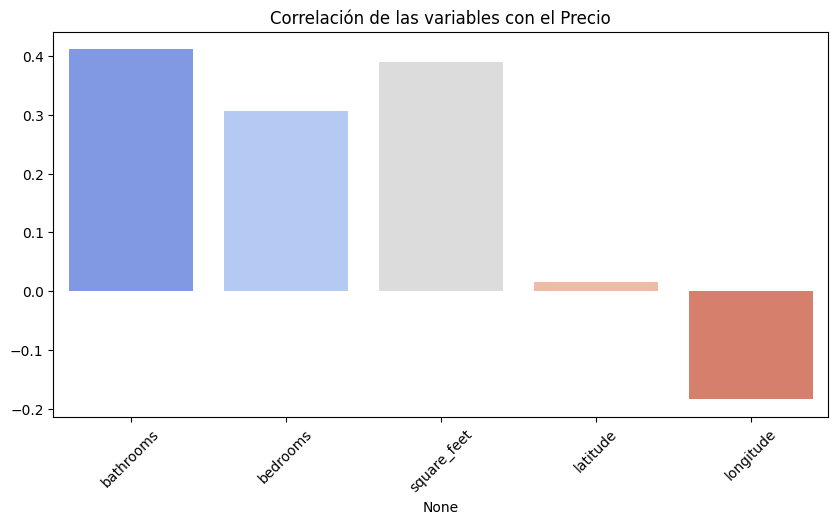

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas relevantes
numerical_vars = ["bathrooms", "bedrooms", "price", "square_feet", "latitude", "longitude"]

# Calcular la matriz de correlación
correlation_matrix = df[numerical_vars].corr()

# Calcular la correlación de todas las variables con "price"
price_correlation = correlation_matrix["price"].drop("price")  # Excluye la correlación de price consigo mismo

# Configurar el tamaño del gráfico de barras
plt.figure(figsize=(10, 5))

# Crear gráfico de barras con la corrección de la advertencia
sns.barplot(x=price_correlation.index, y=price_correlation.values, hue=price_correlation.index, palette="coolwarm", legend=False)

# Girar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Agregar título
plt.title("Correlación de las variables con el Precio")

# Mostrar el gráfico
plt.show()


